<a href="https://colab.research.google.com/github/Jay9093/Blinkit/blob/main/Data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATASET LINK - https://docs.google.com/spreadsheets/d/1ryNsUAIHfzi4rmW7_2vjFUiZgQeBT8gZ/edit?usp=sharing&ouid=103609734308360548547&rtpof=true&sd=true

**BLINKIT DATA ANALYSIS - DATA COLLECTION AND PREPROCESSING**

Team -

1. Vaibhav Gandhi - 959
2. Chakka Yaswanth Gupta - 975
3. Tushar DineshPrabhu - 988
4. Jayashree Manigandan - 2017

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BlinkIT Grocery Data Excel.xlsx to BlinkIT Grocery Data Excel.xlsx


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Step 2: Load the Data
file_path = 'BlinkIT Grocery Data Excel.xlsx'
df = pd.read_excel(file_path)


In [ ]:
# Step 3: Initial Data Check
print("Initial data shape:", df.shape)
print(df.head())
print("\nColumns:\n", df.columns.tolist())

Initial data shape: (8523, 12)
  Item Fat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Size        Outlet Type  Item Visibility  Item Weight     Sales  \
0      Medium  Supermarket Type1         0.100014        15.10  145.4786   
1      Medium  Supermar

In [ ]:
# Step 4: Standardize Column Names (for consistency)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
print("🔹 Step 4: Standardized Column Names")
print(df.columns.tolist())
print("="*60)

🔹 Step 4: Standardized Column Names
['item_fat_content', 'item_identifier', 'item_type', 'outlet_establishment_year', 'outlet_identifier', 'outlet_location_type', 'outlet_size', 'outlet_type', 'item_visibility', 'item_weight', 'sales', 'rating']


In [ ]:
# Step 5: Check and Handle Missing Values
print("🔹 Step 5: Missing Values BEFORE Handling")
print(df.isnull().sum())

# Fill numeric with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("\n🔹 Step 5: Missing Values AFTER Handling")
print(df.isnull().sum())
print("="*60)

🔹 Step 5: Missing Values BEFORE Handling
item_fat_content                0
item_identifier                 0
item_type                       0
outlet_establishment_year       0
outlet_identifier               0
outlet_location_type            0
outlet_size                     0
outlet_type                     0
item_visibility                 0
item_weight                  1463
sales                           0
rating                          0
dtype: int64

🔹 Step 5: Missing Values AFTER Handling
item_fat_content             0
item_identifier              0
item_type                    0
outlet_establishment_year    0
outlet_identifier            0
outlet_location_type         0
outlet_size                  0
outlet_type                  0
item_visibility              0
item_weight                  0
sales                        0
rating                       0
dtype: int64


In [ ]:
# Step 6: Remove Duplicates (if any)
df = df.drop_duplicates()
print("\nData shape after removing duplicates:", df.shape)


Data shape after removing duplicates: (8523, 12)


In [ ]:
# Outlet age
df['outlet_age'] = 2025 - df['outlet_establishment_year']

# Visibility to weight ratio
df['visibility_weight_ratio'] = df['item_visibility'] / (df['item_weight'] + 1e-5)

print("🔹 Step 7: Feature Engineering")
print(df[['outlet_age', 'visibility_weight_ratio']].head())
print("="*60)

🔹 Step 7: Feature Engineering
   outlet_age  visibility_weight_ratio
0          13                 0.006623
1           3                 0.000728
2           9                 0.001870
3          11                 0.003480
4          10                 0.001733


In [ ]:
print("🔹 Step 8: BEFORE Encoding - Columns:", df.columns.tolist())
df = pd.get_dummies(df, columns=['outlet_location_type', 'outlet_size', 'outlet_type', 'item_type'], drop_first=True)
print("AFTER Encoding - Columns:", df.columns.tolist())
print("="*60)

🔹 Step 8: BEFORE Encoding - Columns: ['item_fat_content', 'item_identifier', 'item_type', 'outlet_establishment_year', 'outlet_identifier', 'outlet_location_type', 'outlet_size', 'outlet_type', 'item_visibility', 'item_weight', 'sales', 'rating', 'outlet_age', 'visibility_weight_ratio']
AFTER Encoding - Columns: ['item_fat_content', 'item_identifier', 'outlet_establishment_year', 'outlet_identifier', 'item_visibility', 'item_weight', 'sales', 'rating', 'outlet_age', 'visibility_weight_ratio', 'outlet_location_type_Tier 2', 'outlet_location_type_Tier 3', 'outlet_size_Medium', 'outlet_size_Small', 'outlet_type_Supermarket Type1', 'outlet_type_Supermarket Type2', 'outlet_type_Supermarket Type3', 'item_type_Breads', 'item_type_Breakfast', 'item_type_Canned', 'item_type_Dairy', 'item_type_Frozen Foods', 'item_type_Fruits and Vegetables', 'item_type_Hard Drinks', 'item_type_Health and Hygiene', 'item_type_Household', 'item_type_Meat', 'item_type_Others', 'item_type_Seafood', 'item_type_Snack

In [ ]:
# Step 9: Outlier Detection and Removal
print("🔹 Step 8: Shape BEFORE outlier removal:", df.shape)

# Z-score method
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs(stats.zscore(df[numeric_cols]))

df = df[(z_scores < 3).all(axis=1)]

print("Shape AFTER outlier removal:", df.shape)
print("="*60)

🔹 Step 8: Shape BEFORE outlier removal: (8523, 32)
Shape AFTER outlier removal: (8097, 32)


In [ ]:
# Step 10: Reshape Dataset
df_melted = pd.melt(df, id_vars=['item_identifier', 'outlet_identifier'], value_vars=['sales', 'rating'],
                    var_name='metric', value_name='value')

print("Reshaped (Melted) Data Sample:")
print(df_melted.head())
print("="*60)

Reshaped (Melted) Data Sample:
  item_identifier outlet_identifier metric     value
0           FDX32            OUT049  sales  145.4786
1           NCB42            OUT018  sales  115.3492
2           FDR28            OUT046  sales  165.0210
3           FDL50            OUT013  sales  126.5046
4           DRI25            OUT045  sales   55.1614


In [ ]:
# Step 10: Final Overview
print("🔹 Step 10: Final Cleaned Data Shape:", df.shape)
print(df.head())
print("="*60)


🔹 Step 10: Final Cleaned Data Shape: (8097, 32)
  item_fat_content item_identifier  outlet_establishment_year  \
0          Regular           FDX32                       2012   
1          Low Fat           NCB42                       2022   
2          Regular           FDR28                       2016   
3          Regular           FDL50                       2014   
4          Low Fat           DRI25                       2015   

  outlet_identifier  item_visibility  item_weight     sales  rating  \
0            OUT049         0.100014        15.10  145.4786     5.0   
1            OUT018         0.008596        11.80  115.3492     5.0   
2            OUT046         0.025896        13.85  165.0210     5.0   
3            OUT013         0.042278        12.15  126.5046     5.0   
4            OUT045         0.033970        19.60   55.1614     5.0   

   outlet_age  visibility_weight_ratio  ...  item_type_Fruits and Vegetables  \
0          13                 0.006623  ...           

Visualizations


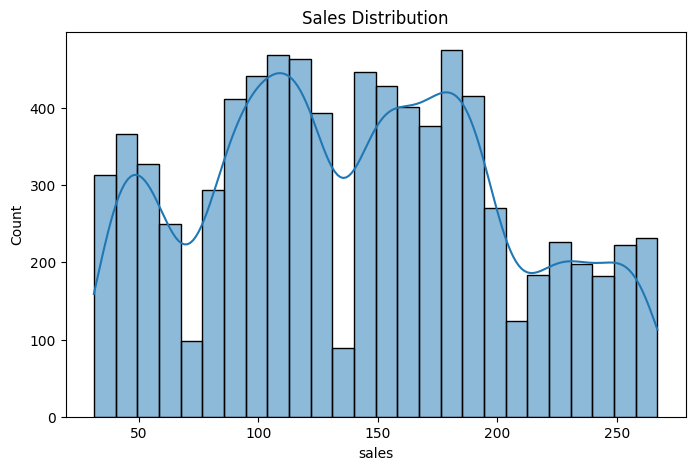

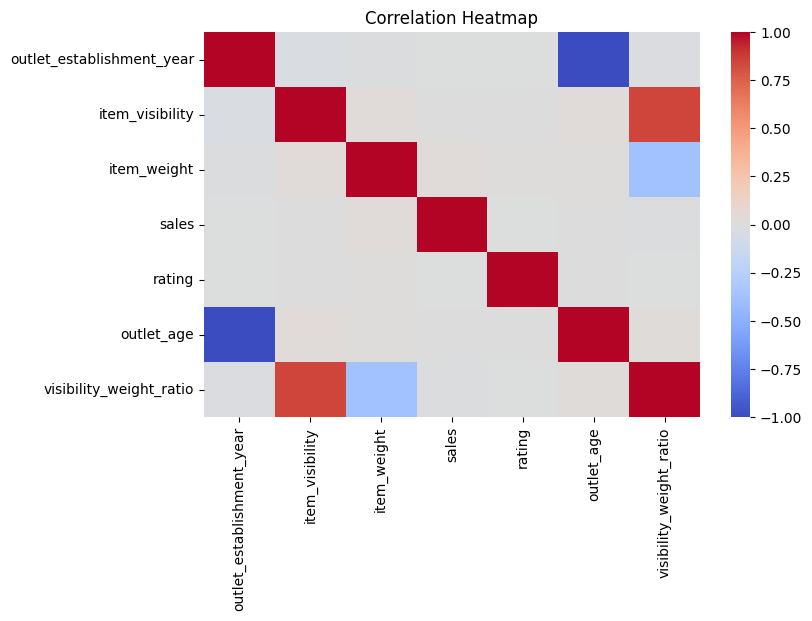

In [ ]:
#Visualizations
print("Visualizations")

plt.figure(figsize=(8, 5))
sns.histplot(df['sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

# Select only numeric features for correlation
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()